# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def random_walk_3d(T0, N):
    x = [T0]
    y = [T0]
    z = [T0]
    seq = [-1, 1]
    for i in range(N):
        x.append(x[-1] + random.choice(seq) * (N**(1/2)))
        y.append(y[-1] + random.choice(seq) * (N**(1/2)))
        z.append(z[-1] + random.choice(seq) * (N**(1/2)))
    return x, y, z

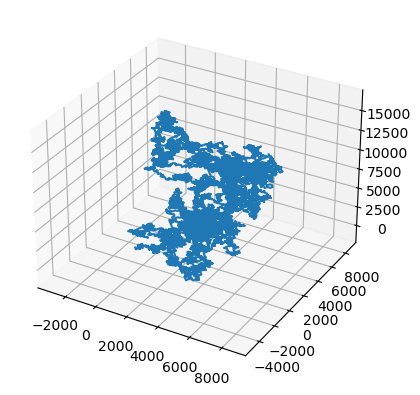

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y, z = random_walk_3d(0, 10000)
ax.plot(x, y, z)
plt.show()







#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

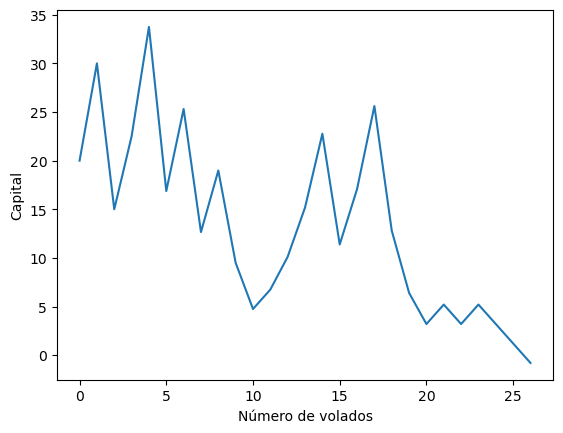

In [16]:
def juego(volado, capital_inicial):
    capital = capital_inicial
    historial_capital = [capital]
    
    while capital > 0:
        apuesta = capital/2 if capital >= 6 else 2
        resultado = random.randint(0, 1)
        capital = capital + (2*resultado-1)*apuesta
        historial_capital.append(capital)
    
    return historial_capital

historial_capital = juego(0, 20)
plt.plot(historial_capital)
plt.xlabel('Número de volados')
plt.ylabel('Capital')
plt.show()

In [23]:
num_jugadores = 10000
num_volados = []

for i in range(num_jugadores):
    capital_inicial = random.uniform(1, 20)
    volado = random.randint(0, 1)
    historial_capital = juego(volado, capital_inicial)
    num_volados.append(len(historial_capital)-1)
    
promedio = num_volados[20]/num_jugadores
promedio

0.0027

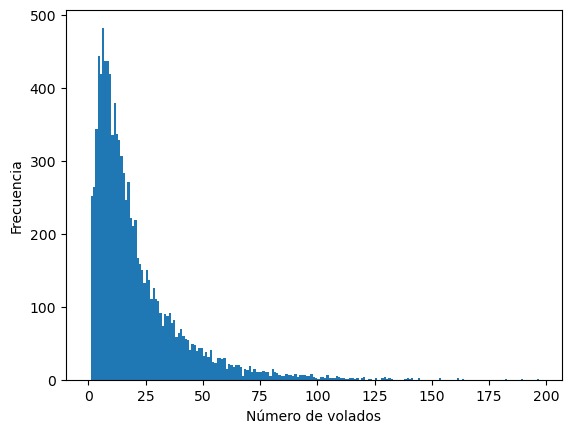

In [18]:
plt.hist(num_volados, bins=range(max(num_volados)+2))
plt.xlabel('Número de volados')
plt.ylabel('Frecuencia')
plt.show()